# New Section

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Alpha-Delta dataset.csv to Alpha-Delta dataset.csv


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

df= pd.read_csv("Alpha-Delta dataset.csv",usecols=['infection_Delta_Global'])


In [ ]:
df1= pd.read_csv("Alpha-Delta dataset.csv",usecols=['infection_Delta_Global'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1
df = df.dropna()

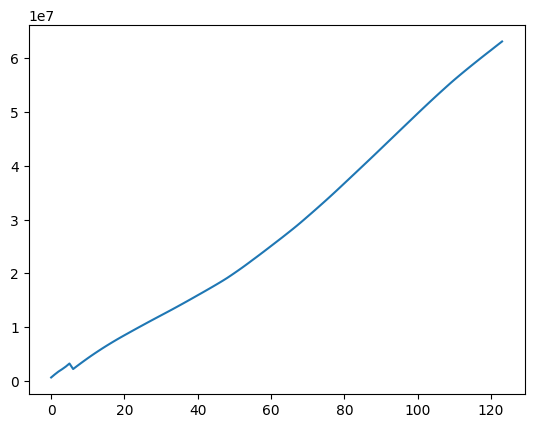

In [ ]:
plt.plot(df)

In [ ]:
#determining parameters
#d
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['infection_Delta_Global'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.143683
p-value: 1.000000


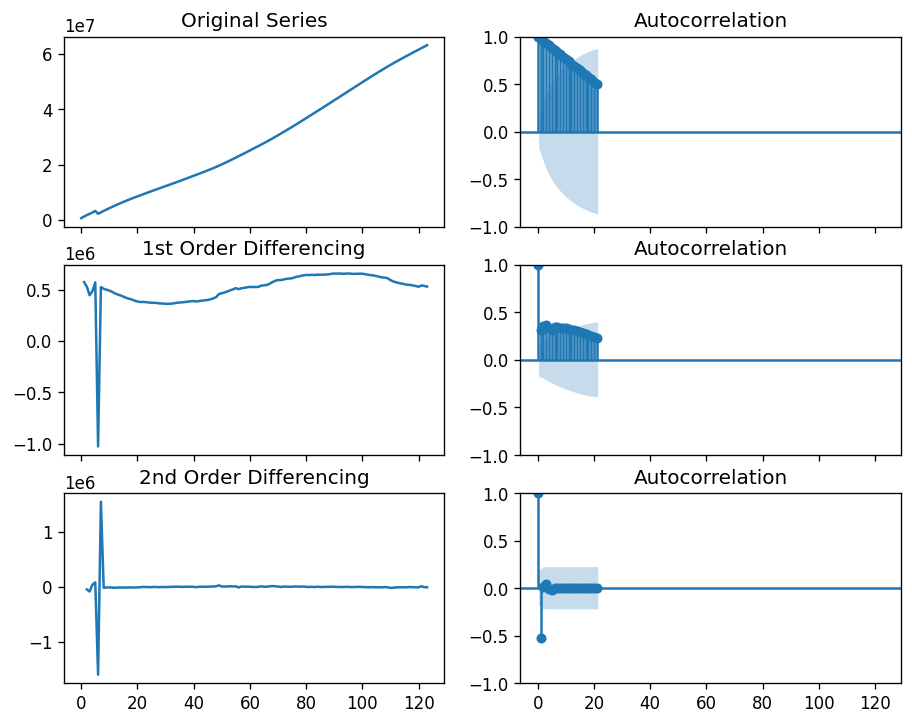

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['infection_Delta_Global']); axes[0, 0].set_title('Original Series')
plot_acf(df['infection_Delta_Global'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['infection_Delta_Global'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['infection_Delta_Global'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['infection_Delta_Global'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['infection_Delta_Global'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


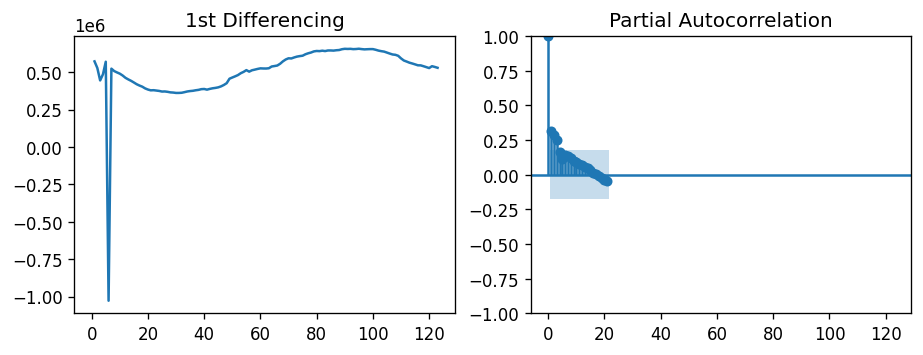

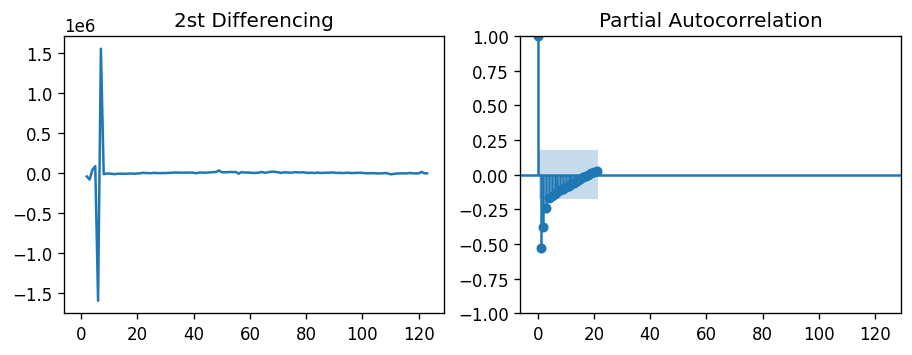

In [ ]:
#determining parameters
#p
# PACF plot of 1st or 2st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Delta_Global'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['infection_Delta_Global'].diff().dropna(), ax=axes[1])


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Delta_Global'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['infection_Delta_Global'].diff().diff().dropna(), ax=axes[1])
plt.show()


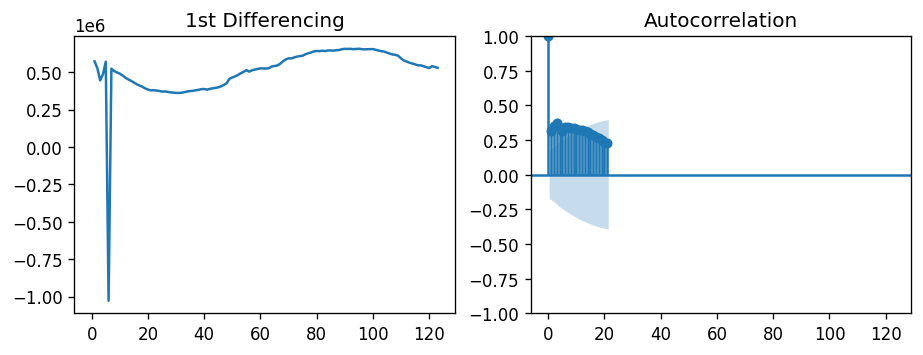

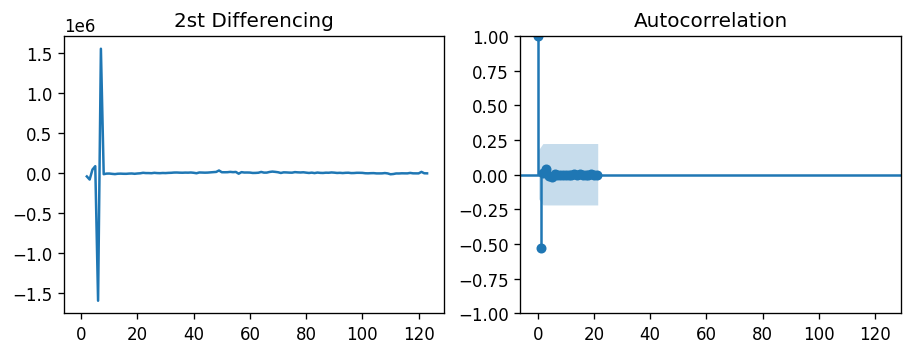

In [ ]:
#determining parameters
#q
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Delta_Global'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['infection_Delta_Global'].diff().dropna(), ax=axes[1])

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Delta_Global'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['infection_Delta_Global'].diff().diff().dropna(), ax=axes[1])
plt.show()




                                 SARIMAX Results                                  
Dep. Variable:     infection_Delta_Global   No. Observations:                  117
Model:                     ARIMA(0, 2, 0)   Log Likelihood               -1571.485
Date:                    Mon, 17 Apr 2023   AIC                           3144.969
Time:                            19:25:29   BIC                           3147.714
Sample:                                 0   HQIC                          3146.084
                                    - 117                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.259e+10   1.04e+09     40.825      0.000    4.05e+10    4.46e+10
Ljung-Box (L1) (Q):                  32.87   Jarque-Bera (JB):             13977.21
Prob(Q):       

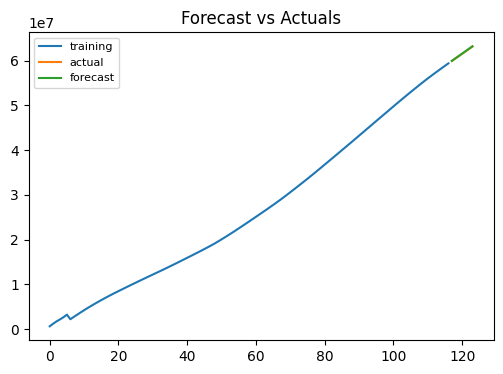

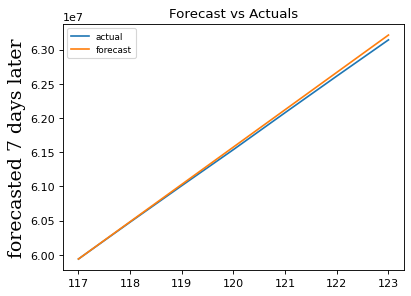

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=7
# Create Training and Test
train = df['infection_Delta_Global'][:len(df)-n_future]
test = df['infection_Delta_Global'][len(df)-n_future:]

model = ARIMA(train, order=(0, 2, 0))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 7 days later", fontdict = font1)
plt.show()



In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.000530241682410606,
 'me': 33032.14285713434,
 'mae': 33032.14285713434,
 'mpe': 0.000530241682410606,
 'rmse': 40701.527078204155}

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                 SARIMAX Results                                  
Dep. Variable:     infection_Delta_Global   No. Observations:                  110
Model:                     ARIMA(2, 2, 2)   Log Likelihood               -1462.514
Date:                    Mon, 17 Apr 2023   AIC                           2935.027
Time:                            19:32:24   BIC                           2948.438
Sample:                                 0   HQIC                          2940.465
                                    - 110                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7356      0.039    -18.944      0.000      -0.812      -0.660
ar.L2          0.2419      0.046      5.219      0.000       0.151       0.333
ma.L1       4.193e-0

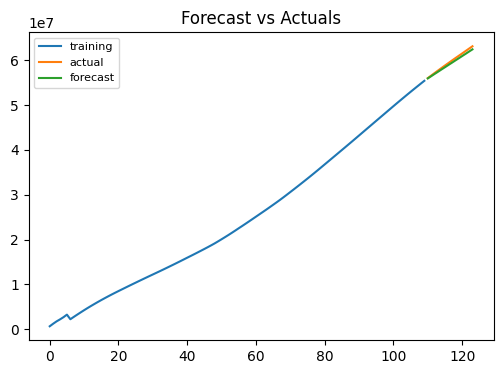

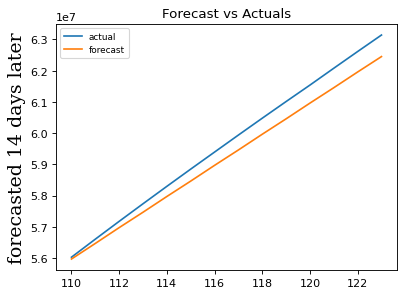

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=14
# Create Training and Test
train = df['infection_Delta_Global'][:len(df)-n_future]
test = df['infection_Delta_Global'][len(df)-n_future:]

model = ARIMA(train, order=(2, 2, 2))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 14 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.006950517704118466,
 'me': -420994.2294623511,
 'mae': 420994.2294623511,
 'mpe': -0.006950517704118466,
 'rmse': 462713.28351537895}

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                 SARIMAX Results                                  
Dep. Variable:     infection_Delta_Global   No. Observations:                  103
Model:                     ARIMA(1, 1, 1)   Log Likelihood               -1368.404
Date:                    Mon, 17 Apr 2023   AIC                           2742.807
Time:                            19:35:52   BIC                           2750.682
Sample:                                 0   HQIC                          2745.996
                                    - 103                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9988      0.006    172.354      0.000       0.987       1.010
ma.L1         -0.8877      0.097     -9.156      0.000      -1.078      -0.698
sigma2      3.145e+1

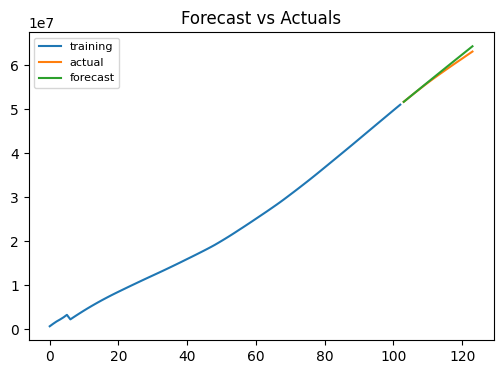

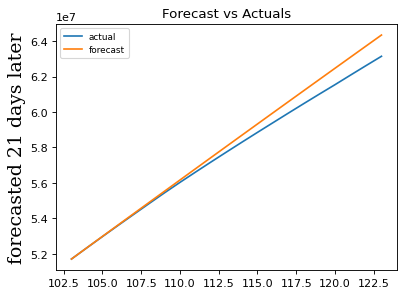

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=21
# Create Training and Test
train = df['infection_Delta_Global'][:len(df)-n_future]
test = df['infection_Delta_Global'][len(df)-n_future:]

model = ARIMA(train, order=(1, 1, 1))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 21 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.007073528134215514,
 'me': 428538.5263947497,
 'mae': 428538.5263947497,
 'mpe': 0.007073528134215514,
 'rmse': 581444.7258582847}

In [ ]:
#########

In [ ]:
##deaths

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

df= pd.read_csv("Alpha-Delta dataset.csv",usecols=['death_Delta_Global'])


In [ ]:
df1= pd.read_csv("Alpha-Delta dataset.csv",usecols=['death_Delta_Global'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1
df = df.dropna()

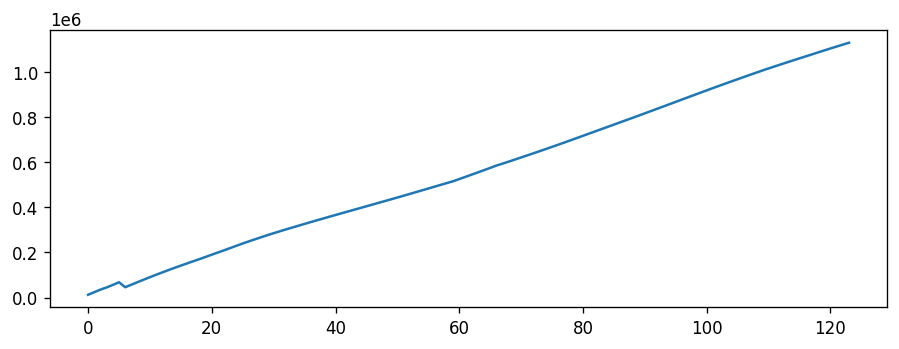

In [ ]:
plt.plot(df)

In [ ]:
#determining parameters
#d
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['death_Delta_Global'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.292805
p-value: 0.996568


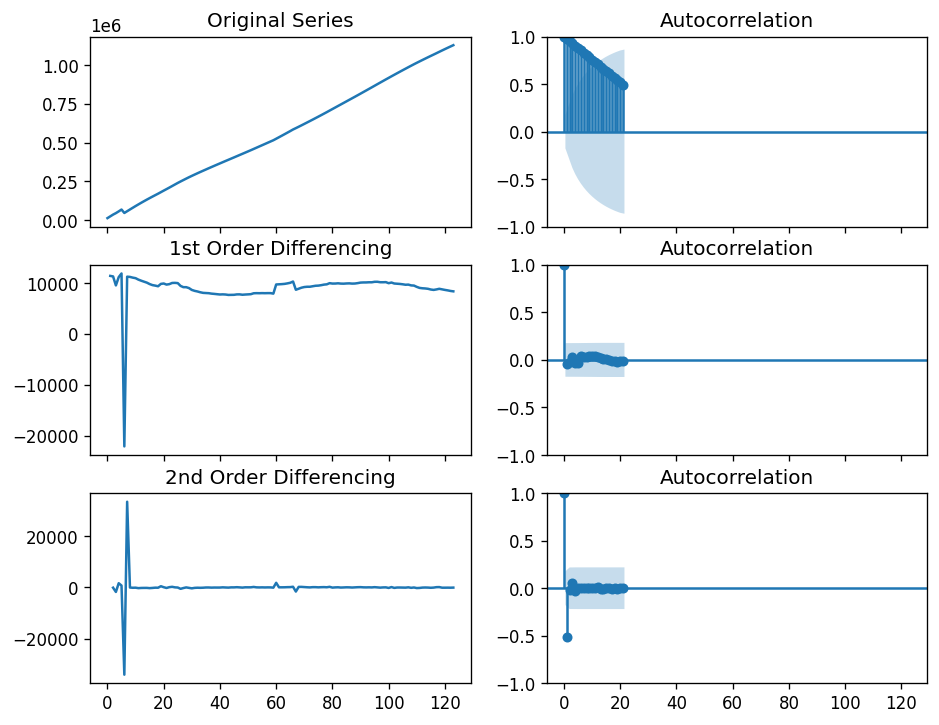

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['death_Delta_Global']); axes[0, 0].set_title('Original Series')
plot_acf(df['death_Delta_Global'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['death_Delta_Global'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['death_Delta_Global'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['death_Delta_Global'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['death_Delta_Global'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


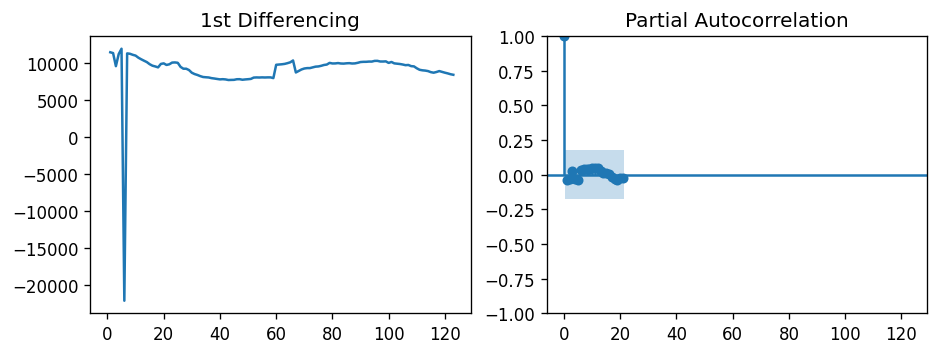

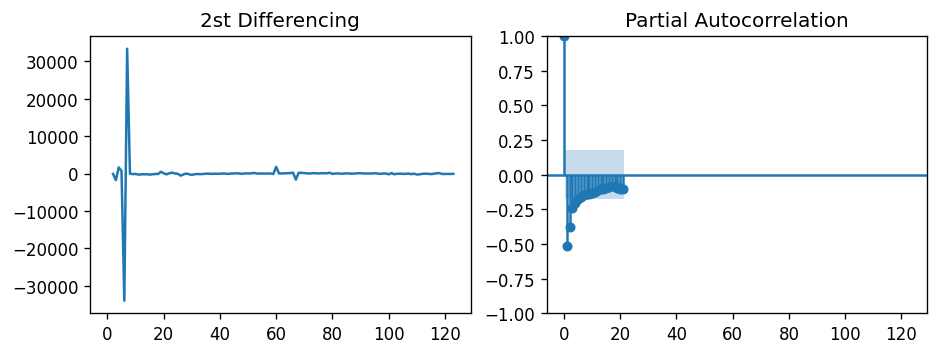

In [ ]:
#determining parameters
#p
# PACF plot of 1st or 2st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Delta_Global'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['death_Delta_Global'].diff().dropna(), ax=axes[1])


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Delta_Global'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['death_Delta_Global'].diff().diff().dropna(), ax=axes[1])
plt.show()

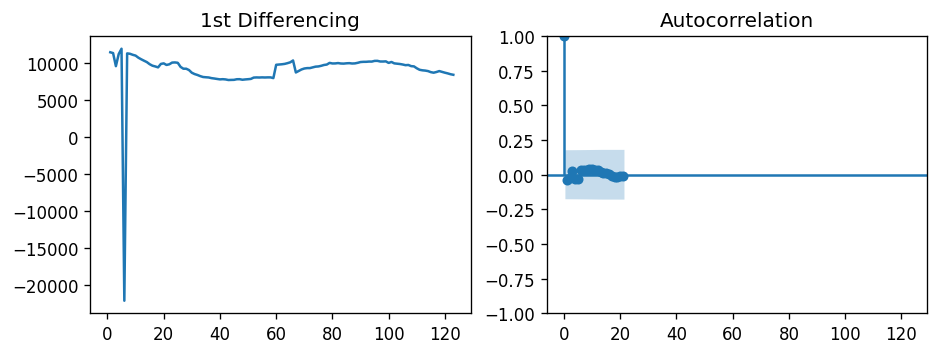

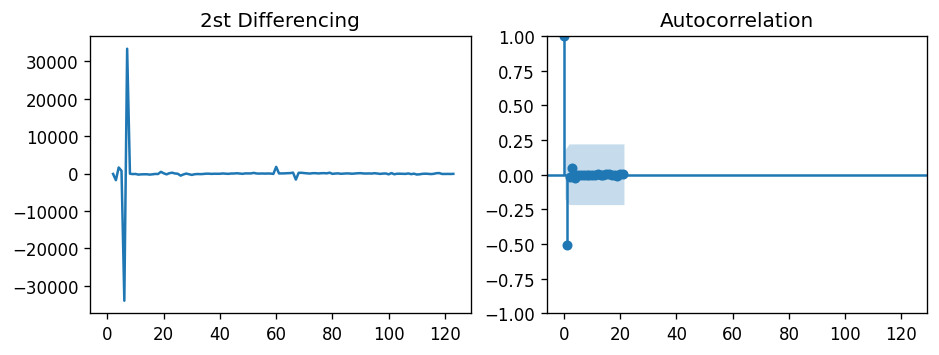

In [ ]:
#determining parameters
#q
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Delta_Global'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['death_Delta_Global'].diff().dropna(), ax=axes[1])

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Delta_Global'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['death_Delta_Global'].diff().diff().dropna(), ax=axes[1])
plt.show()

                               SARIMAX Results                                
Dep. Variable:     death_Delta_Global   No. Observations:                  117
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1129.421
Date:                Mon, 17 Apr 2023   AIC                           2260.842
Time:                        19:49:26   BIC                           2263.586
Sample:                             0   HQIC                          2261.956
                                - 117                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.952e+07   4.79e+05     40.753      0.000    1.86e+07    2.05e+07
Ljung-Box (L1) (Q):                  30.57   Jarque-Bera (JB):             13873.45
Prob(Q):                              0.00   Pr

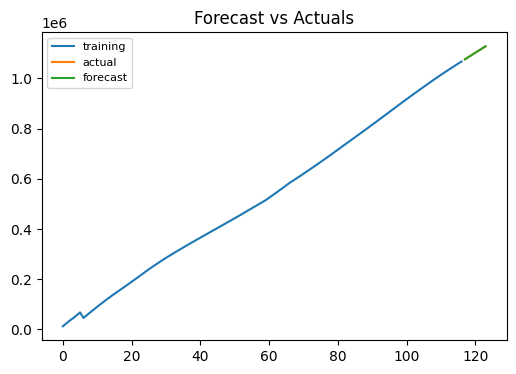

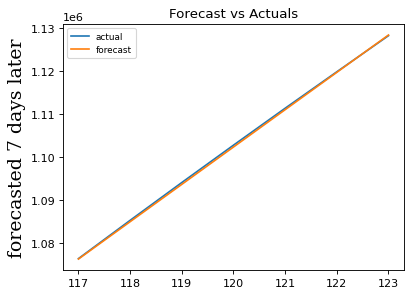

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=7
# Create Training and Test
train = df['death_Delta_Global'][:len(df)-n_future]
test = df['death_Delta_Global'][len(df)-n_future:]

model = ARIMA(train, order=(0, 2, 0))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 7 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.00024306750286533682,
 'me': -224.18367347014802,
 'mae': 267.6530612248794,
 'mpe': -0.00020453694056836688,
 'rmse': 297.5258667741061}

                               SARIMAX Results                                
Dep. Variable:     death_Delta_Global   No. Observations:                  110
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1026.087
Date:                Mon, 17 Apr 2023   AIC                           2062.173
Time:                        19:50:52   BIC                           2075.584
Sample:                             0   HQIC                          2067.611
                                - 110                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0416   2455.420     -0.000      1.000   -4813.576    4811.493
ar.L2         -0.0416    102.059     -0.000      1.000    -200.074     199.991
ma.L1      -2.135e-07   2670.908  -7.99e-11      1.0

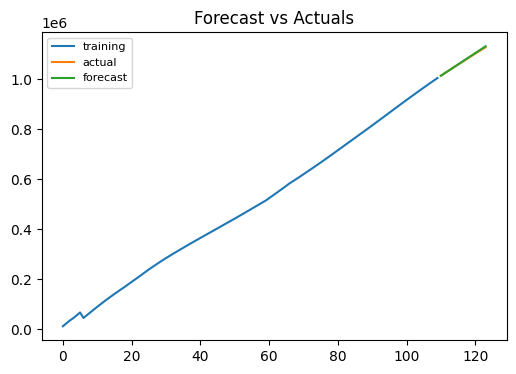

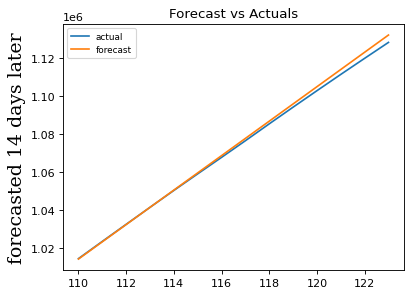

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=14
# Create Training and Test
train = df['death_Delta_Global'][:len(df)-n_future]
test = df['death_Delta_Global'][len(df)-n_future:]

model = ARIMA(train, order=(2, 2, 2))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 14 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.001181122787873914,
 'me': 1223.9174885073194,
 'mae': 1301.6203367606754,
 'mpe': 0.001105102100699856,
 'rmse': 1771.5368574937968}

                               SARIMAX Results                                
Dep. Variable:     death_Delta_Global   No. Observations:                  103
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -962.891
Date:                Mon, 17 Apr 2023   AIC                           1935.782
Time:                        19:52:49   BIC                           1948.858
Sample:                             0   HQIC                          1941.076
                                - 103                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0444   1244.638     -0.001      0.999   -2440.490    2438.401
ar.L2         -0.0444     55.203     -0.001      0.999    -108.240     108.151
ma.L1      -1.017e-07   1340.045  -7.59e-11      1.0

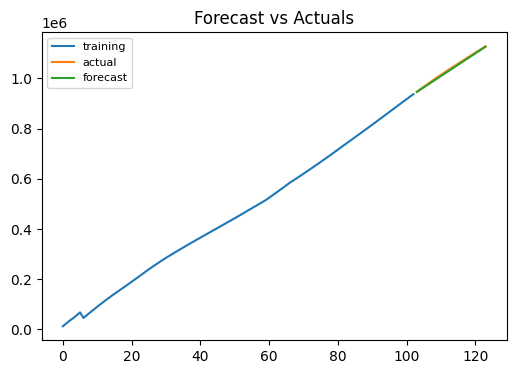

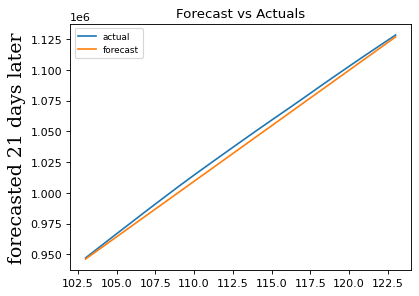

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=21
# Create Training and Test
train = df['death_Delta_Global'][:len(df)-n_future]
test = df['death_Delta_Global'][len(df)-n_future:]

model = ARIMA(train, order=(2, 2, 2))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 21 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.0034707974144473318,
 'me': -3605.0360701916893,
 'mae': 3605.0360701916893,
 'mpe': -0.0034707974144473318,
 'rmse': 3817.0121377726105}